Download pdf or import pdf of your choice

In [9]:
import os
import requests

pdf_path = os.path.join("/content/drive/MyDrive/Colab Notebooks/Human-Nutrition-2020-Edition-1598491699.pdf")

if not os.path.exists(pdf_path):
    print("file does not exist...but down loading")

    url ="https://pressbooks.oer.hawaii.edu/humannutrition2/open/download?type=pdf"

    filename =pdf_path

    response = requests.get(url)

    if response.status_code == "200" :
      with open(filename, "wb") as file:
        file.write(response.content)

      print(f"file downloaded successfully  {filename}")
    else:
      print(f"download failled . Status code: {response.status_code}")

else:
  print(f"file already exist {pdf_path}")

file already exist /content/drive/MyDrive/Colab Notebooks/Human-Nutrition-2020-Edition-1598491699.pdf


Checking the availability of GPU in my system

*   According to availability make choice of llm


In [1]:
# Get GPU available memory
import torch
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Available GPU memory: {gpu_memory_gb} GB")

Available GPU memory: 15 GB


In [2]:
# Note: the following is Gemma focused, however, there are more and more LLMs of the 2B and 7B size appearing for local use.
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.")
    use_quantization_config = False
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb > 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommend model: Gemma 7B in 4-bit or float16 precision.")
    use_quantization_config = False
    model_id = "google/gemma-7b-it"

print(f"use_quantization_config set to: {use_quantization_config}")
print(f"model_id set to: {model_id}")

GPU memory: 15 | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.
use_quantization_config set to: False
model_id set to: google/gemma-2b-it


We can import the pages of our PDF to text by first defining the PDF path and then opening and reading it with PyMuPDF (import fitz).

In [10]:
!pip install PyMuPDF
import fitz
from tqdm.auto import tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 66.3 MB/s eta 0:00:00


Opens a PDF file, reads its text content page by page, and collects statistics.

In [11]:
def text_formatter(text: str) -> str :
  cleaned_text = text.replace("\n"," ").strip()

  return cleaned_text

def open_read_pdf(pdf_path: str) -> list[dict]:
  doc = fitz.open(pdf_path)
  pages_and_texts = []
  for page_number, page in tqdm(enumerate(doc)):
    text = page.get_text()
    text = text_formatter(text =text)
    pages_and_texts.append({"page_number" : page_number - 41 ,
                            "page_char_count" : len(text),
                            "page_word_count" : len(text.split(" ")),
                            "page_sentence_count" : len(text.split(". ")),
                            "page_token_count" : len(text)/ 4, #1 token = 4 char
                            "text": text})

  return pages_and_texts

pages_and_texts = open_read_pdf(pdf_path = pdf_path)
pages_and_texts[: 3]

0it [00:00, ?it/s]

[{'page_number': -41,
  'page_char_count': 29,
  'page_word_count': 4,
  'page_sentence_count': 1,
  'page_token_count': 7.25,
  'text': 'Human Nutrition: 2020 Edition'},
 {'page_number': -40,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_sentence_count': 1,
  'page_token_count': 0.0,
  'text': ''},
 {'page_number': -39,
  'page_char_count': 320,
  'page_word_count': 54,
  'page_sentence_count': 1,
  'page_token_count': 80.0,
  'text': 'Human Nutrition: 2020  Edition  UNIVERSITY OF HAWAI‘I AT MĀNOA  FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM  ALAN TITCHENAL, SKYLAR HARA,  NOEMI ARCEO CAACBAY, WILLIAM  MEINKE-LAU, YA-YUN YANG, MARIE  KAINOA FIALKOWSKI REVILLA,  JENNIFER DRAPER, GEMADY  LANGFELDER, CHERYL GIBBY, CHYNA  NICOLE CHUN, AND ALLISON  CALABRESE'}]

In [12]:
import random

random.sample(pages_and_texts , k= 3)

[{'page_number': 167,
  'page_char_count': 807,
  'page_word_count': 148,
  'page_sentence_count': 9,
  'page_token_count': 201.75,
  'text': 'Image by  Allison  Calabrese /  CC BY 4.0  Figure 3.6 Regulating Water Intake  Regulation of Daily Water Output  As stated, daily water output averages 2.5 liters. There are two types  of outputs. The first type is insensible water loss, meaning we are  unaware of it. The body loses about 400 milliliters of its daily water  output through exhalation. Another 500 milliliters is lost through  our skin. The second type of output is sensible water loss, meaning  we are aware of it. Urine accounts for about 1,500 milliliters of water  output, and feces account for roughly 100 milliliters of water output.  Regulating urine output is a primary function of the kidneys, and  involves communication with the brain and endocrine system.  Figure 3.7 Regulating Water Output  Regulation of Water Balance  |  167'},
 {'page_number': 1074,
  'page_char_count': 17

In [13]:
import pandas as pd
df = pd.DataFrame(pages_and_texts)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count,text
0,-41,29,4,1,7.25,Human Nutrition: 2020 Edition
1,-40,0,1,1,0.00,
2,-39,320,54,1,80.00,Human Nutrition: 2020 Edition UNIVERSITY OF ...
3,-38,212,32,1,53.00,Human Nutrition: 2020 Edition by University of...
4,-37,797,145,2,199.25,Contents Preface University of Hawai‘i at Mā...


In [14]:
df.describe()

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count
count,1208.00000,1208.000000,1208.000000,1208.000000,1208.000000
mean,562.50000,1148.004139,198.299669,9.972682,287.001035
std,348.86387,560.382275,95.759336,6.187226,140.095569
min,-41.00000,0.000000,1.000000,1.000000,0.000000
25%,260.75000,762.000000,134.000000,4.000000,190.500000
50%,562.50000,1231.500000,214.500000,10.000000,307.875000
75%,864.25000,1603.500000,271.000000,14.000000,400.875000
max,1166.00000,2308.000000,429.000000,32.000000,577.000000


In [15]:
#token count (embeddings )
from spacy.lang.en import English
nlp = English()
nlp.add_pipe("sentencizer")

#eg
doc = nlp("this is my first sen.  this is second. this is third")
assert len(list(doc.sents)) == 3

list(doc.sents)

[this is my first sen.,  this is second., this is third]

Through above example shown how token counts work

In [16]:
pages_and_texts[600]

{'page_number': 559,
 'page_char_count': 863,
 'page_word_count': 136,
 'page_sentence_count': 8,
 'page_token_count': 215.75,
 'text': 'Image by  Allison  Calabrese /  CC BY 4.0  Korsakoff syndrome can cause similar symptoms as beriberi such  as confusion, loss of coordination, vision changes, hallucinations,  and may progress to coma and death. This condition is specific  to alcoholics as diets high in alcohol can cause thiamin deficiency.  Other individuals at risk include individuals who also consume diets  typically low in micronutrients such as those with eating disorders,  elderly, and individuals who have gone through gastric bypass  surgery.5  Figure 9.10 The Role of Thiamin  Figure 9.11 Beriberi, Thiamin Deficiency  5.\xa0Fact Sheets for Health Professionals: Thiamin. National  Institute of Health, Office of Dietary Supplements.  \xa0https://ods.od.nih.gov/factsheets/Thiamin- HealthProfessional/. Updated Feburary 11, 2016.  Accessed October 22, 2017.  Water-Soluble Vitamins  

In [17]:
for item in tqdm(pages_and_texts):
  item["sentences"] = list(nlp(item["text"]).sents)
#all sen is str
  item["sentences"] = [str(sentences) for sentences in item["sentences"]]
#count sen
  item["page_sentence_count_spacy"] = len(item["sentences"])

  0%|          | 0/1208 [00:00<?, ?it/s]

In [18]:
random.sample(pages_and_texts , k= 1)

[{'page_number': 541,
  'page_char_count': 920,
  'page_word_count': 144,
  'page_sentence_count': 8,
  'page_token_count': 230.0,
  'text': 'Vitamin E Toxicity  Currently, researchers have not found any adverse effects from  consuming vitamin E in food. Although that may be the case,  supplementation of alpha-tocopherol in animals has shown to cause  hemorrhage and disrupt blood coagulation. \xa0Extremely high levels  of vitamin E can interact with vitamin K-dependent clotting factors  causing an inhibition of blood clotting.11  Dietary Reference Intakes for Vitamin E  The Recommended Dietary Allowances (RDAs) and Tolerable Upper  Intake Levels (ULs) for different age groups for vitamin E are given  in Table 9.6 “Dietary Reference Intakes for Vitamin E”.  Table 9.6 Dietary Reference Intakes for Vitamin E  11.\xa0Dietary Supplement Fact Sheet: Vitamin E.National  Institutes of Health, Office of Dietary Supplements.  http://ods.od.nih.gov/factsheets/VitaminE- QuickFacts/. Updated Octobe

In [19]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count,page_sentence_count_spacy
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,9.97,287.00,10.32
std,348.86,560.38,95.76,6.19,140.10,6.30
min,-41.00,0.00,1.00,1.00,0.00,0.00
25%,260.75,762.00,134.00,4.00,190.50,5.00
50%,562.50,1231.50,214.50,10.00,307.88,10.00
75%,864.25,1603.50,271.00,14.00,400.88,15.00
max,1166.00,2308.00,429.00,32.00,577.00,28.00


Chunking our sentences together

On average each of our pages has 10 sentences.

And an average total of 287 tokens per page.

So our groups of 10 sentences will also be ~287 tokens long.

This gives us plenty of room for the text to embedded by our all-mpnet-base-v2 model (it has a capacity of 384 tokens).

In [20]:
num_sentences_chunk_size = 10
# 20 -> 10,10  or 25 ->10,10,5
def split_list(input_list: list[str],
               slice_size: int = num_sentences_chunk_size)->list[list[str]]:
        return [input_list[i: i+ slice_size] for i in range (0,len(input_list),slice_size)]


test_list = list(range(25))
split_list(test_list)


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [21]:
for item in tqdm(pages_and_texts):
  item["sentence_chunks"]=split_list(input_list=item["sentences"],
                            slice_size=num_sentences_chunk_size)
  item["num_chunks"]=len(item["sentence_chunks"])

  0%|          | 0/1208 [00:00<?, ?it/s]

In [22]:
random.sample(pages_and_texts,k=1)

[{'page_number': 44,
  'page_char_count': 607,
  'page_word_count': 114,
  'page_sentence_count': 4,
  'page_token_count': 151.75,
  'text': '(Source:  UNICEF,  1986, How to  weigh and  measure  children:  assessing the  nutrition  status of  young  children)  Biochemical methods of assessing nutritional  status  Biochemical or laboratory methods of assessment include  measuring a nutrient or its metabolite in the blood, feces, urine or  other tissues that have a relationship with the nutrient. An example  of this method would be to take blood samples to measure levels  of glucose in the body. This method is useful for determining if an  individual has diabetes.  Figure 1.4 Measuring Blood Glucose Levels  44  |  Types of Scientific Studies',
  'sentences': ['(Source:  UNICEF,  1986, How to  weigh and  measure  children:  assessing the  nutrition  status of  young  children)  Biochemical methods of assessing nutritional  status  Biochemical or laboratory methods of assessment include  m

In [23]:
df =pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count,page_sentence_count_spacy,num_chunks
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,9.97,287.00,10.32,1.53
std,348.86,560.38,95.76,6.19,140.10,6.30,0.64
min,-41.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,260.75,762.00,134.00,4.00,190.50,5.00,1.00
50%,562.50,1231.50,214.50,10.00,307.88,10.00,1.00
75%,864.25,1603.50,271.00,14.00,400.88,15.00,2.00
max,1166.00,2308.00,429.00,32.00,577.00,28.00,3.00


Splitting each chunk into its own item

In [24]:
#SPLITING each chunk ito its own item

import re

pages_and_chunks = []
for item in tqdm (pages_and_texts):
  for sentence_chunk in item["sentence_chunks"]:
    chunk_dict= {}
    chunk_dict["page_number"]=item["page_number"]

    joined_sentence_chunk = "".join(sentence_chunk).replace("  ", " ").strip()
    joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk)

    chunk_dict["sentence_chunk"]=joined_sentence_chunk

    chunk_dict["chunk_char_count"]=len(joined_sentence_chunk)
    chunk_dict["chunk_word_count"]=len([word for word in joined_sentence_chunk.split(" ")])
    chunk_dict["chunk_token_count"]=len(joined_sentence_chunk) / 4

    pages_and_chunks.append(chunk_dict)

len(pages_and_chunks)



  0%|          | 0/1208 [00:00<?, ?it/s]

1843

In [25]:
random.sample(pages_and_chunks,k=1)

[{'page_number': 85,
  'sentence_chunk': 'Blood’s Function in the Body and in Metabolism Support You know you cannot live without blood, and that your heart pumps your blood over a vast network of veins and arteries within your body, carrying oxygen to your cells. However, beyond these basic facts, what do you know about your blood? Blood transports absorbed nutrients to cells and waste products from cells. It supports cellular metabolism by transporting synthesized macromolecules from one cell type to another and carrying waste products away from cells. Additionally, it transports molecules, such as hormones, allowing for communication between organs. The volume of blood coursing throughout an adult human body is about 5 liters (1.3 US gallons) and accounts for approximately 8 percent of human body weight. What Makes Up Blood and How Do These Substances Support Blood Function? Blood is about 78 percent water and 22 percent solids by volume. The liquid part of blood is called plasma an

In [26]:
df =pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,1843.00,1843.00,1843.00,1843.00
mean,583.38,734.44,112.33,183.61
std,347.79,447.54,71.22,111.89
min,-41.00,12.00,3.00,3.00
25%,280.50,315.00,44.00,78.75
50%,586.00,746.00,114.00,186.50
75%,890.00,1118.50,173.00,279.62
max,1166.00,1831.00,297.00,457.75


Try to make calculation for model requirement
#457-384=73
as accordingly 457 token are being created but model could only use 384 token so approx 73 would not contribute to our project

In [27]:
#filter chunks

min_token_length = 30

for row in df[df["chunk_token_count"] <= min_token_length].sample(5).iterrows():
  print(f'chunck token count : {row[1]["chunk_token_count"]}  | Text : {row[1]["sentence_chunk"]}')

chunck token count : 18.0  | Text : Updated July 24, 2017. Accessed April 15, 2018. 1112 | Threats to Health
chunck token count : 21.0  | Text : Updated September 2003. Accessed November 28,2017. Discovering Nutrition Facts | 735
chunck token count : 16.25  | Text : Complementary foods include baby meats, vegetables, Infancy | 837
chunck token count : 9.75  | Text : Table 3.5 Salt Substitutes Sodium | 185
chunck token count : 23.25  | Text : They regulate osmolarity of the blood by regulating both solutes and The Urinary System | 115


well analized those 73 tokens to see if its useful or should be discarded

In [28]:
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]


[{'page_number': -39,
  'sentence_chunk': 'Human Nutrition: 2020 Edition UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM ALAN TITCHENAL, SKYLAR HARA, NOEMI ARCEO CAACBAY, WILLIAM MEINKE-LAU, YA-YUN YANG, MARIE KAINOA FIALKOWSKI REVILLA, JENNIFER DRAPER, GEMADY LANGFELDER, CHERYL GIBBY, CHYNA NICOLE CHUN, AND ALLISON CALABRESE',
  'chunk_char_count': 308,
  'chunk_word_count': 42,
  'chunk_token_count': 77.0},
 {'page_number': -38,
  'sentence_chunk': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food Science and Human Nutrition Program is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.',
  'chunk_char_count': 210,
  'chunk_word_count': 30,
  'chunk_token_count': 52.5}]

In [29]:
random.sample(pages_and_chunks_over_min_token_len , k=1)

[{'page_number': 235,
  'sentence_chunk': 'Bacteria in the gut can break some of these down and may benefit gastrointestinal health. Isolated and modified starches are used widely in the food industry and during cooking as food thickeners. Figure 4.4 Structures of the Plant Starches and Glycogen Introduction | 235',
  'chunk_char_count': 272,
  'chunk_word_count': 44,
  'chunk_token_count': 68.0}]

Our goal is to turn each of our chunks into a numerical representation (an embedding vector, where a vector is a sequence of numbers arranged in order).

In [30]:
#text to embeddings
#embeddings model
!pip install sentence-transformers

from sentence_transformers import SentenceTransformer

embedding_model= SentenceTransformer(model_name_or_path ="all-mpnet-base-v2",device="cuda")


#embedding_model = SentenceTransformer("all-mpnet-base-v2")  # Defaults to CPU

sentences= [ "the sentence transformer libraray provides an easy way to create embeddings .",
            "sentences can be embedded one by one or in a list .",
             "i like horses !"]

embeddings = embedding_model.encode(sentences)
embeddings_dict = dict(zip(sentences,embeddings))


for sentences, embedding in embeddings_dict.items():
  print(f"Sencentes : {sentences}")
  print(f"Embeddings : {embedding}")
  print("")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Sencentes : the sentence transformer libraray provides an easy way to create embeddings .
Embeddings : [-1.76357701e-02  2.98387855e-02 -2.72796936e-02  5.71419895e-02
 -2.19306853e-02  3.56629794e-03  1.53874820e-02 -5.51626794e-02
  9.32124816e-03 -1.70039982e-02  6.77983090e-03  5.22385016e-02
 -3.80637795e-02  1.28794769e-02  5.04972339e-02 -4.41124327e-02
  4.99488451e-02  1.02087092e-02 -2.49169022e-02  1.20844012e-02
  4.14051339e-02  2.60593705e-02  1.70086101e-02  5.46674617e-02
 -2.38279253e-02 -2.11125594e-02 -7.95995176e-04 -3.11825536e-02
  6.24161512e-02 -5.37137641e-03 -3.08857188e-02 -1.04943318e-02
  4.49261256e-02 -1.72827970e-02  9.93220283e-07  6.83472585e-03
 -3.06828637e-02 -6.34227879e-03  1.24098305e-02 -1.47287278e-02
  5.67514561e-02 -5.87361231e-02  3.70678045e-02  4.51335683e-02
 -4.92234938e-02 -2.84604393e-02  5.10189012e-02  9.39595699e-03
  7.96326175e-02  4.64729853e-02 -2.38868035e-02 -3.72183770e-02
  1.01268953e-02 -1.35857072e-02 -1.45353675e-02  1.

In [31]:
embeddings[0].shape

(768,)

In [32]:
embedding = embedding_model.encode("my favourite animal is cow")
embedding

array([-9.21414979e-03,  8.87037069e-02, -2.51310412e-02, -2.74915062e-02,
        4.00892496e-02,  4.37048785e-02, -7.65400156e-02,  2.26357877e-02,
        2.73859669e-02, -1.58532020e-02, -5.09624891e-02,  2.64987871e-02,
       -3.43281701e-02,  1.15894768e-02, -2.55632140e-02, -3.71369496e-02,
        3.10211051e-02,  2.41591898e-03, -5.38050383e-03,  2.99286321e-02,
       -1.68309044e-02,  3.75664160e-02, -1.52704669e-02, -2.26567890e-02,
       -5.58476476e-03,  9.41321254e-03, -4.33536759e-03, -3.67276706e-02,
        2.35188678e-02,  2.69529987e-02, -5.05251102e-02, -7.53692538e-02,
        2.36065462e-02, -3.02981865e-02,  1.27883789e-06,  7.88887404e-03,
       -2.41745804e-02,  4.54755826e-03,  4.74361181e-02, -2.28106976e-04,
       -1.05339922e-02,  7.11557968e-03, -5.06189605e-03,  4.93142847e-03,
        5.76685881e-03,  5.59862480e-02,  4.32129055e-02,  8.10808595e-03,
       -7.92748332e-02,  2.30842512e-02, -6.94673276e-03, -3.03875115e-02,
       -2.28617396e-02, -

In [33]:
%%time

embedding_model.to("cuda")

for item in tqdm(pages_and_chunks_over_min_token_len):
  item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/1680 [00:00<?, ?it/s]

CPU times: user 32.8 s, sys: 120 ms, total: 32.9 s
Wall time: 34.2 s


In [34]:
%%time

text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]
text_chunks[419]

CPU times: user 420 µs, sys: 0 ns, total: 420 µs
Wall time: 424 µs


'often. • Calm your “sweet tooth” by eating fruits, such as berries or an apple. • Replace sugary soft drinks with seltzer water, tea, or a small amount of 100 percent fruit juice added to water or soda water. The Food Industry: Functional Attributes of Carbohydrates and the Use of Sugar Substitutes In the food industry, both fast-releasing and slow-releasing carbohydrates are utilized to give foods a wide spectrum of functional attributes, including increased sweetness, viscosity, bulk, coating ability, solubility, consistency, texture, body, and browning capacity. The differences in chemical structure between the different carbohydrates confer their varied functional uses in foods. Starches, gums, and pectins are used as thickening agents in making jam, cakes, cookies, noodles, canned products, imitation cheeses, and a variety of other foods. Molecular gastronomists use slow- releasing carbohydrates, such as alginate, to give shape and texture to their fascinating food creations. Add

In [35]:
len(text_chunks)

1680

In [36]:
%%time

text_chunk_embeddings =embedding_model.encode(text_chunks,
                                              batch_size = 32,
                                              convert_to_tensor= True)

text_chunk_embeddings

CPU times: user 22.8 s, sys: 24.6 ms, total: 22.8 s
Wall time: 23 s


tensor([[ 0.0674,  0.0902, -0.0051,  ..., -0.0221, -0.0232,  0.0126],
        [ 0.0552,  0.0592, -0.0166,  ..., -0.0120, -0.0103,  0.0227],
        [ 0.0280,  0.0340, -0.0206,  ..., -0.0054,  0.0213,  0.0313],
        ...,
        [ 0.0771,  0.0098, -0.0122,  ..., -0.0409, -0.0752, -0.0241],
        [ 0.1030, -0.0165,  0.0083,  ..., -0.0574, -0.0283, -0.0295],
        [ 0.0864, -0.0125, -0.0113,  ..., -0.0522, -0.0337, -0.0299]],
       device='cuda:0')

Save embeddings to file

In [37]:
#save embeddings to file

text_chunks_and_embeddings_df=pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "/content/drive/MyDrive/Colab Notebooks/text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index =False)


In [38]:
text_chunks_and_embeddings_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_and_embeddings_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,[ 6.74242675e-02 9.02281404e-02 -5.09548886e-...
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,[ 5.52156419e-02 5.92139773e-02 -1.66167244e-...
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50,[ 2.79801842e-02 3.39813754e-02 -2.06426680e-...
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25,[ 6.82566911e-02 3.81275006e-02 -8.46854132e-...
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,[ 3.30264494e-02 -8.49763490e-03 9.57159605e-...


These were some questions to keep in mind for these type of projects .............
vector database for large files?
which embedding model to use ?
what are the other forms of text chunking/spliting are there today ? Which would be useful for a project ..?

what should i think about when creating my embeddings..?
where should i store embeddings..?

many more....

# **RAG**

ingest documents -> split into chunks -> embed chunks -> make a query -> embed the query -> compare query embedding to chunk embeddings

And we get relevant resources along with the source they came from!

That's the retrieval part of Retrieval Augmented Generation (RAG).

In [66]:
import random

import torch
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

# Import texts and embedding df
#text_chunks_and_embedding_df = pd.read_csv("text_chunks_and_embeddings_df.csv")
text_chunks_and_embeddings_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/text_chunks_and_embeddings_df.csv")
# Convert embedding column back to np.array (it got converted to string when it got saved to CSV)
text_chunks_and_embeddings_df["embedding"] = text_chunks_and_embeddings_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# Convert texts and embedding df to list of dicts
pages_and_chunks = text_chunks_and_embeddings_df.to_dict(orient="records")

# Convert embeddings to torch tensor and send to device (note: NumPy arrays are float64, torch tensors are float32 by default)
embeddings = torch.tensor(np.array(text_chunks_and_embeddings_df["embedding"].tolist()), dtype=torch.float32).to(device)
embeddings.shape

torch.Size([1680, 768])

do check the shape ..very neccessary

In [67]:
text_chunks_and_embeddings_df["embedding"]

,embedding
0,"[0.0674242675, 0.0902281404, -0.00509548886, -..."
1,"[0.0552156419, 0.0592139773, -0.0166167244, -0..."
2,"[0.0279801842, 0.0339813754, -0.020642668, 0.0..."
3,"[0.0682566911, 0.0381275006, -0.00846854132, -..."
4,"[0.0330264494, -0.0084976349, 0.00957159605, -..."
...,...
1675,"[0.0185622536, -0.0164277665, -0.0127045633, -..."
1676,"[0.0334720612, -0.0570440851, 0.0151489386, -0..."
1677,"[0.0770515501, 0.00978557579, -0.0121817412, 0..."
1678,"[0.103045158, -0.0164701864, 0.00826846063, 0...."


In [68]:
embeddings.shape

torch.Size([1680, 768])

In [69]:
embeddings[0]

tensor([ 6.7424e-02,  9.0228e-02, -5.0955e-03, -3.1755e-02,  7.3908e-02,
         3.5198e-02, -1.9799e-02,  4.6769e-02,  5.3573e-02,  5.0123e-03,
         3.3393e-02, -1.6222e-03,  1.7608e-02,  3.6265e-02, -3.1668e-04,
        -1.0712e-02,  1.5426e-02,  2.6218e-02,  2.7765e-03,  3.6494e-02,
        -4.4411e-02,  1.8936e-02,  4.9012e-02,  1.6402e-02, -4.8578e-02,
         3.1829e-03,  2.7299e-02, -2.0476e-03, -1.2283e-02, -7.2805e-02,
         1.2045e-02,  1.0730e-02,  2.1000e-03, -8.1777e-02,  2.6783e-06,
        -1.8143e-02, -1.2080e-02,  2.4717e-02, -6.2747e-02,  7.3544e-02,
         2.2162e-02, -3.2877e-02, -1.8010e-02,  2.2295e-02,  5.6137e-02,
         1.7951e-03,  5.2593e-02, -3.3174e-03, -8.3387e-03, -1.0628e-02,
         2.3192e-03, -2.2393e-02, -1.5301e-02, -9.9306e-03,  4.6532e-02,
         3.5747e-02, -2.5476e-02,  2.6369e-02,  3.7491e-03, -3.8268e-02,
         2.5833e-02,  4.1287e-02,  2.5818e-02,  3.3297e-02, -2.5178e-02,
         4.5152e-02,  4.4907e-04, -9.9662e-02,  4.9

In [71]:
text_chunks_and_embeddings_df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,"[0.0674242675, 0.0902281404, -0.00509548886, -..."
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,"[0.0552156419, 0.0592139773, -0.0166167244, -0..."
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50,"[0.0279801842, 0.0339813754, -0.020642668, 0.0..."
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25,"[0.0682566911, 0.0381275006, -0.00846854132, -..."
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,"[0.0330264494, -0.0084976349, 0.00957159605, -..."


Embedding model

In [72]:
# create model
from sentence_transformers import util, SentenceTransformer
embedding_model = SentenceTransformer("all-mpnet-base-v2" ,
                                      device=device)

SOME TERMS YOU HAVE TO UNDERSTAND

small semantic search pipeline ,
define query ,
query into embedding ,
dot product or cosine similarity (between text and query)
note: same shape ..same datatype (of both)

In [73]:
# 1. Define the query
# Note: This could be anything. But since we're working with a nutrition textbook, we'll stick with nutrition-based queries.
query = "macronutrients functions"
print(f"Query: {query}")

# 2. Embed the query to the same numerical space as the text examples
# Note: It's important to embed your query with the same model you embedded your examples with.
query_embedding = embedding_model.encode(query, convert_to_tensor=True)

# 3. Get similarity scores with the dot product (we'll time this for fun)
from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
end_time = timer()

print(f"Time take to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

# 4. Get the top-k results (we'll keep this to 5)
top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product


Query: macronutrients functions
Time take to get scores on 1680 embeddings: 0.02528 seconds.


torch.return_types.topk(
values=tensor([0.6926, 0.6738, 0.6646, 0.6536, 0.6473], device='cuda:0'),
indices=tensor([42, 47, 41, 51, 46], device='cuda:0'))

In [74]:
query_embedding.dtype

torch.float32

In [75]:
pages_and_chunks[42]

{'page_number': 5,
 'sentence_chunk': 'Macronutrients Nutrients that are needed in large amounts are called macronutrients. There are three classes of macronutrients: carbohydrates, lipids, and proteins. These can be metabolically processed into cellular energy. The energy from macronutrients comes from their chemical bonds. This chemical energy is converted into cellular energy that is then utilized to perform work, allowing our bodies to conduct their basic functions. A unit of measurement of food energy is the calorie. On nutrition food labels the amount given for “calories” is actually equivalent to each calorie multiplied by one thousand. A kilocalorie (one thousand calories, denoted with a small “c”) is synonymous with the “Calorie” (with a capital “C”) on nutrition food labels. Water is also a macronutrient in the sense that you require a large amount of it, but unlike the other macronutrients, it does not yield calories. Carbohydrates Carbohydrates are molecules composed of car

In [76]:
larger_embeddings = torch.randn(100*embeddings.shape[0], 768).to(device)
print(f"Embeddings shape: {larger_embeddings.shape}")

# Perform dot product across 168,000 embeddings
start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=larger_embeddings)[0]
end_time = timer()

print(f"Time take to get scores on {len(larger_embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

Embeddings shape: torch.Size([168000, 768])
Time take to get scores on 168000 embeddings: 0.00080 seconds.


searching embeddings time depends on device ...exhaustive search (index helps to narraw it down )
ann(just like knn) ,faiss..for learning bases

In [77]:
#(pretty version)
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

 Print the page number so we can reference the textbook further (and check the results)

In [78]:
print(f"Query: '{query}'\n")
print("Results:")

for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:.4f}")

    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])

    print(f"Page number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query: 'macronutrients functions'

Results:
Score: 0.6926
Text:
Macronutrients Nutrients that are needed in large amounts are called
macronutrients. There are three classes of macronutrients: carbohydrates,
lipids, and proteins. These can be metabolically processed into cellular energy.
The energy from macronutrients comes from their chemical bonds. This chemical
energy is converted into cellular energy that is then utilized to perform work,
allowing our bodies to conduct their basic functions. A unit of measurement of
food energy is the calorie. On nutrition food labels the amount given for
“calories” is actually equivalent to each calorie multiplied by one thousand. A
kilocalorie (one thousand calories, denoted with a small “c”) is synonymous with
the “Calorie” (with a capital “C”) on nutrition food labels. Water is also a
macronutrient in the sense that you require a large amount of it, but unlike the
other macronutrients, it does not yield calories. Carbohydrates Carbohydrates
are 

learning topic :re-ranking model

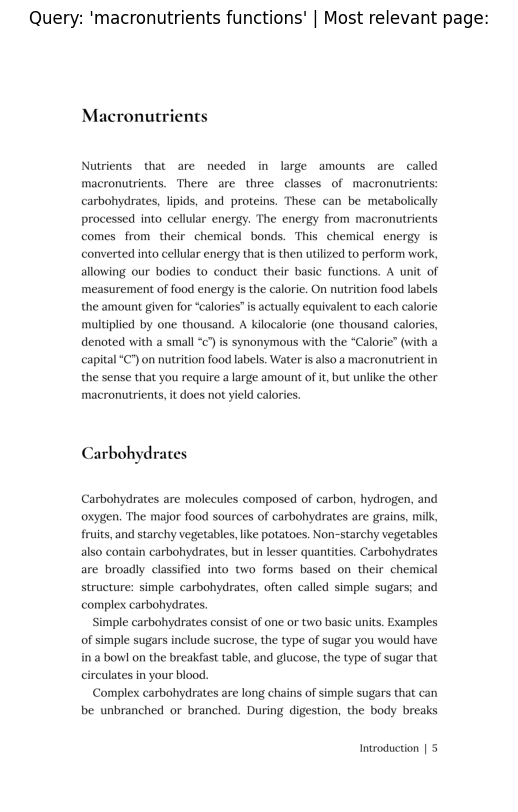

In [79]:
import fitz

# Open PDF and load target page
pdf_path = os.path.join("/content/drive/MyDrive/Colab Notebooks/Human-Nutrition-2020-Edition-1598491699.pdf")

doc = fitz.open(pdf_path)
page = doc.load_page(5 + 41) # number of page (our doc starts page numbers on page 41)

# Get the image of the page
img = page.get_pixmap(dpi=300)

# Optional: save the image
#img.save("output_filename.png")
doc.close()

# Convert the Pixmap to a numpy array
img_array = np.frombuffer(img.samples_mv,
                          dtype=np.uint8).reshape((img.h, img.w, img.n))

# Display the image using Matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most relevant page:")
plt.axis('off') # Turn off axis
plt.show()

Two types of similarity measures (dot prod , cosine similarity )

In [80]:
import torch

def dot_product(vector1, vector2):
    return torch.dot(vector1, vector2)

def cosine_similarity(vector1, vector2):
    dot_product = torch.dot(vector1, vector2)

    # Get Euclidean/L2 norm of each vector (removes the magnitude, keeps direction)
    norm_vector1 = torch.sqrt(torch.sum(vector1**2))
    norm_vector2 = torch.sqrt(torch.sum(vector2**2))


vector1 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector2 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector3 = torch.tensor([4, 5, 6], dtype=torch.float32)
vector4 = torch.tensor([-1, -2, -3], dtype=torch.float32)

# Calculate dot product
print("Dot product between vector1 and vector2:", dot_product(vector1, vector2))
print("Dot product between vector1 and vector3:", dot_product(vector1, vector3))
print("Dot product between vector1 and vector4:", dot_product(vector1, vector4))

# Calculate cosine similarity
print("Cosine similarity between vector1 and vector2:", cosine_similarity(vector1, vector2))
print("Cosine similarity between vector1 and vector3:", cosine_similarity(vector1, vector3))
print("Cosine similarity between vector1 and vector4:", cosine_similarity(vector1, vector4))

Dot product between vector1 and vector2: tensor(14.)
Dot product between vector1 and vector3: tensor(32.)
Dot product between vector1 and vector4: tensor(-14.)
Cosine similarity between vector1 and vector2: None
Cosine similarity between vector1 and vector3: None
Cosine similarity between vector1 and vector4: None


Well here Cosine similarity should contains some value .,well it was way trial

functioning into a pipeline

In [81]:
def retrieve_relevant_resources(query: str,
                                embeddings: torch.tensor,
                                model: SentenceTransformer=embedding_model,
                                n_resources_to_return: int=5,
                                print_time: bool=True):
    """
    Embeds a query with model and returns top k scores and indices from embeddings.
    """

    # Embed the query
    query_embedding = model.encode(query,
                                   convert_to_tensor=True)

    # Get dot product scores on embeddings
    start_time = timer()
    dot_scores = util.dot_score(query_embedding, embeddings)[0]
    end_time = timer()

    if print_time:
        print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

    scores, indices = torch.topk(input=dot_scores,
                                 k=n_resources_to_return)

    return scores, indices


In [ ]:
#retrieve_relevant_resources(query=query,embeddings=embeddings,n_resources_to_return=5)

In [82]:
def print_top_results_and_scores(query: str,
                                 embeddings: torch.tensor,
                                 pages_and_chunks: list[dict]=pages_and_chunks,
                                 n_resources_to_return: int=5):
    """
    Takes a query, retrieves most relevant resources and prints them out in descending order.

    Note: Requires pages_and_chunks to be formatted in a specific way (see above for reference).
    """

    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings,
                                                  n_resources_to_return=n_resources_to_return)

    print(f"Query: {query}\n")
    print("Results:")
    # Loop through zipped together scores and indicies
    for score, index in zip(scores, indices):
        print(f"Score: {score:.4f}")
        # Print relevant sentence chunk (since the scores are in descending order, the most relevant chunk will be first)
        print_wrapped(pages_and_chunks[index]["sentence_chunk"])
        # Print the page number too so we can reference the textbook further and check the results
        print(f"Page number: {pages_and_chunks[index]['page_number']}")
        print("\n")



In [83]:
query = "symptoms of pellagra"

# Get just the scores and indices of top related results
print_top_results_and_scores(query=query,embeddings=embeddings)

[INFO] Time taken to get scores on 1680 embeddings: 0.00007 seconds.
Query: symptoms of pellagra

Results:
Score: 0.5000
Niacin deficiency is commonly known as pellagra and the symptoms include
fatigue, decreased appetite, and indigestion.  These symptoms are then commonly
followed by the four D’s: diarrhea, dermatitis, dementia, and sometimes death.
Figure 9.12  Conversion of Tryptophan to Niacin Water-Soluble Vitamins | 565
Page number: 565


Score: 0.3741
car. Does it drive faster with a half-tank of gas or a full one?It does not
matter; the car drives just as fast as long as it has gas. Similarly, depletion
of B vitamins will cause problems in energy metabolism, but having more than is
required to run metabolism does not speed it up. Buyers of B-vitamin supplements
beware; B vitamins are not stored in the body and all excess will be flushed
down the toilet along with the extra money spent. B vitamins are naturally
present in numerous foods, and many other foods are enriched with th

In [84]:
query = "symptoms of pellagra"

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

[INFO] Time taken to get scores on 1680 embeddings: 0.00007 seconds.


(tensor([0.5000, 0.3741, 0.2959, 0.2793, 0.2721], device='cuda:0'),
 tensor([ 822,  853, 1536, 1555, 1531], device='cuda:0'))

LLMS


Make choice of LLM based on :
How much hardware VRAM available?  
Run these beforehand to understand which llm u could use


In [2]:
import torch
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Available GPU memory: {gpu_memory_gb} GB")

Available GPU memory: 15 GB


In [3]:
# Note: the following is Gemma focused, however, there are more and more LLMs of the 2B and 7B size appearing for local use.
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.")
    use_quantization_config = False
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb > 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommend model: Gemma 7B in 4-bit or float16 precision.")
    use_quantization_config = False
    model_id = "google/gemma-7b-it"

print(f"use_quantization_config set to: {use_quantization_config}")
print(f"model_id set to: {model_id}")

GPU memory: 15 | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.
use_quantization_config set to: False
model_id set to: google/gemma-2b-it


load llm locally using hugging face transformers

Needs:
A quantization config ,
model ID ,
tokenzier ,
LLM model





In [3]:
from huggingface_hub import notebook_login
notebook_login()


In [5]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available

from huggingface_hub import notebook_login
notebook_login()
# 1. Create quantization config for smaller model loading (optional)

# Requires

!pip install bitsandbytes accelerate

# For models that require 4-bit quantization (use this if you have low GPU memory available)
from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

# Bonus: Setup Flash Attention 2 for faster inference, default to "sdpa" or "scaled dot product attention" if it's not available

if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0] >= 8):
  attn_implementation = "flash_attention_2"
else:
  attn_implementation = "sdpa"
print(f"[INFO] Using attention implementation: {attn_implementation}")

# 2. Pick a model we'd like to use (this will depend on how much GPU memory you have available)

#in my case it was model_id = "google/gemma-2b-it"
model_id = model_id # (we already set this above)
print(f"[INFO] Using model_id: {model_id}")

# 3. Instantiate tokenizer (tokenizer turns text into numbers ready for the model)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

llm_model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=model_id,
                                                 torch_dtype=torch.float16, # datatype to use, we want float16
                                                 quantization_config=quantization_config if use_quantization_config else None,
                                                 low_cpu_mem_usage=False, # use full memory
                                                 attn_implementation=attn_implementation) # which attention version to use

if not use_quantization_config: # quantization takes care of device setting automatically, so if it's not used, send model to GPU
    llm_model.to("cuda")


[INFO] Using attention implementation: sdpa
[INFO] Using model_id: google/gemma-2b-it


tokenizer_config.json:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [6]:
llm_model

GemmaForCausalLM(
  (model): GemmaModel(
    (embed_tokens): Embedding(256000, 2048, padding_idx=0)
    (layers): ModuleList(
      (0-17): 18 x GemmaDecoderLayer(
        (self_attn): GemmaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
        )
        (mlp): GemmaMLP(
          (gate_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (up_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (down_proj): Linear(in_features=16384, out_features=2048, bias=False)
          (act_fn): GELUActivation()
        )
        (input_layernorm): GemmaRMSNorm((2048,), eps=1e-06)
        (post_attention_layernorm): GemmaRMSNorm((2048,), eps=1e-06)
      )
    )
    (norm): GemmaRMSNorm((2048,), 

Based our harware we got our llm locally yaayayy!!!!

In [7]:
def get_model_num_params(model: torch.nn.Module):
    return sum([param.numel() for param in model.parameters()])

get_model_num_params(llm_model)

2506172416

In [8]:
def get_model_mem_size(model: torch.nn.Module):
    """
    Get how much memory a PyTorch model takes up.

    """
    # Get model parameters and buffer sizes
    mem_params = sum([param.nelement() * param.element_size() for param in model.parameters()])
    mem_buffers = sum([buf.nelement() * buf.element_size() for buf in model.buffers()])

    # Calculate various model sizes
    model_mem_bytes = mem_params + mem_buffers # in bytes
    model_mem_mb = model_mem_bytes / (1024**2) # in megabytes
    model_mem_gb = model_mem_bytes / (1024**3) # in gigabytes

    return {"model_mem_bytes": model_mem_bytes,
            "model_mem_mb": round(model_mem_mb, 2),
            "model_mem_gb": round(model_mem_gb, 2)}

get_model_mem_size(llm_model)

{'model_mem_bytes': 5012345344, 'model_mem_mb': 4780.15, 'model_mem_gb': 4.67}

In [85]:
input_text = "What are the macronutrients, and what roles do they play in the human body?"
print(f"Input text:\n{input_text}")

# Create prompt template for instruction-tuned model
dialogue_template = [
    {"role": "user",
     "content": input_text}
]

# Apply the chat template
prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                       tokenize=False, # keep as raw text (not tokenized)
                                       add_generation_prompt=True)
print(f"\nPrompt (formatted):\n{prompt}")

Input text:
What are the macronutrients, and what roles do they play in the human body?

Prompt (formatted):
<bos><start_of_turn>user
What are the macronutrients, and what roles do they play in the human body?<end_of_turn>
<start_of_turn>model



In [86]:

# Tokenize the input text (turn it into numbers) and send it to GPU
input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")
print(f"Model input (tokenized):\n{input_ids}\n")

# Generate outputs passed on the tokenized input
outputs = llm_model.generate(**input_ids,
                             max_new_tokens=256) # define the maximum number of new tokens to create
print(f"Model output (tokens):\n{outputs[0]}\n")

Model input (tokenized):
{'input_ids': tensor([[     2,      2,    106,   1645,    108,   1841,    708,    573, 186809,
         184592, 235269,    578,   1212,  16065,    749,    984,   1554,    575,
            573,   3515,   2971, 235336,    107,    108,    106,   2516,    108]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1]], device='cuda:0')}

Model output (tokens):
tensor([     2,      2,    106,   1645,    108,   1841,    708,    573, 186809,
        184592, 235269,    578,   1212,  16065,    749,    984,   1554,    575,
           573,   3515,   2971, 235336,    107,    108,    106,   2516,    108,
         21404, 235269,   1517, 235303, 235256,    476,  25497,    576,    573,
        186809, 184592,    578,   1024,  16065,    575,    573,   3515,   2971,
        235292,    109,    688,  12298,   1695, 184592,  66058,    109, 235287,
          5231, 156615,  56227,  66058,    108,   

In [87]:
# Decode the output tokens to text
outputs_decoded = tokenizer.decode(outputs[0])
print(f"Model output (decoded):\n{outputs_decoded}\n")

Model output (decoded):
<bos><bos><start_of_turn>user
What are the macronutrients, and what roles do they play in the human body?<end_of_turn>
<start_of_turn>model
Sure, here's a breakdown of the macronutrients and their roles in the human body:

**Macronutrients:**

* **Carbohydrates:**
    * Provide energy for the body's cells and tissues.
    * Carbohydrates are the primary source of energy for most cells.
    * Complex carbohydrates are those that take longer to digest, such as whole grains, fruits, and vegetables.
    * Simple carbohydrates are those that are quickly digested, such as sugar, starch, and lactose.

* **Proteins:**
    * Build and repair tissues, enzymes, and hormones.
    * Proteins are essential for immune function, hormone production, and tissue repair.
    * There are different types of proteins, each with specific functions.

* **Fats:**
    * Provide energy, insulation, and help absorb vitamins.
    * Healthy fats include olive oil, avocado, nuts, and seeds.
  

In [88]:
print(f"Input text: {input_text}\n")
print(f"Output text:\n{outputs_decoded.replace(prompt, '').replace('<bos>', '').replace('<eos>', '')}")

Input text: What are the macronutrients, and what roles do they play in the human body?

Output text:
Sure, here's a breakdown of the macronutrients and their roles in the human body:

**Macronutrients:**

* **Carbohydrates:**
    * Provide energy for the body's cells and tissues.
    * Carbohydrates are the primary source of energy for most cells.
    * Complex carbohydrates are those that take longer to digest, such as whole grains, fruits, and vegetables.
    * Simple carbohydrates are those that are quickly digested, such as sugar, starch, and lactose.

* **Proteins:**
    * Build and repair tissues, enzymes, and hormones.
    * Proteins are essential for immune function, hormone production, and tissue repair.
    * There are different types of proteins, each with specific functions.

* **Fats:**
    * Provide energy, insulation, and help absorb vitamins.
    * Healthy fats include olive oil, avocado, nuts, and seeds.
    * Trans fats can raise cholesterol levels and increase the r

In [89]:
# Nutrition-style questions generated with GPT4
gpt4_questions = [
    "What are the macronutrients, and what roles do they play in the human body?",
    "How do vitamins and minerals differ in their roles and importance for health?",
    "Describe the process of digestion and absorption of nutrients in the human body.",
    "What role does fibre play in digestion? Name five fibre containing foods.",
    "Explain the concept of energy balance and its importance in weight management."
]

# Manually created question list
manual_questions = [
    "How often should infants be breastfed?",
    "What are symptoms of pellagra?",
    "How does saliva help with digestion?",
    "What is the RDI for protein per day?",
    "water soluble vitamins"
]

query_list = gpt4_questions + manual_questions

In [90]:
import random
query = random.choice(query_list)

print(f"Query: {query}")

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

Query: Describe the process of digestion and absorption of nutrients in the human body.
[INFO] Time taken to get scores on 1680 embeddings: 0.00007 seconds.


(tensor([0.7485, 0.7013, 0.6914, 0.6755, 0.6625], device='cuda:0'),
 tensor([125, 134, 380, 148, 681], device='cuda:0'))

Note: The process of augmenting or changing a prompt to an LLM is known as prompt engineering.

In [96]:
def prompt_formatter(query: str,
                     context_items: list[dict]) -> str:
    """
    Augments query with text-based context from context_items.
    """
    # Join context items into one dotted paragraph
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])

    # Create a base prompt with examples to help the model
    # Note: this is very customizable, I've chosen to use 3 examples of the answer style we'd like.
    # We could also write this in a txt file and import it in if we wanted.
    base_prompt = """Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.
\nExample 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is essential for blood clotting and bone metabolism.
\nExample 2:
Query: What are the causes of type 2 diabetes?
Answer: Type 2 diabetes is often associated with overnutrition, particularly the overconsumption of calories leading to obesity. Factors include a diet high in refined sugars and saturated fats, which can lead to insulin resistance, a condition where the body's cells do not respond effectively to insulin. Over time, the pancreas cannot produce enough insulin to manage blood sugar levels, resulting in type 2 diabetes. Additionally, excessive caloric intake without sufficient physical activity exacerbates the risk by promoting weight gain and fat accumulation, particularly around the abdomen, further contributing to insulin resistance.
\nExample 3:
Query: What is the importance of hydration for physical performance?
Answer: Hydration is crucial for physical performance because water plays key roles in maintaining blood volume, regulating body temperature, and ensuring the transport of nutrients and oxygen to cells. Adequate hydration is essential for optimal muscle function, endurance, and recovery. Dehydration can lead to decreased performance, fatigue, and increased risk of heat-related illnesses, such as heat stroke. Drinking sufficient water before, during, and after exercise helps ensure peak physical performance and recovery.
\nNow use the following context items to answer the user query:
{context}
\nRelevant passages: <extract relevant passages from the context here>
User query: {query}
Answer:"""

    # Update base prompt with context items and query
    base_prompt = base_prompt.format(context=context, query=query)

    # Create prompt template for instruction-tuned model
    dialogue_template = [
        {"role": "user",
        "content": base_prompt}
    ]

    # Apply the chat template
    prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                          tokenize=False,
                                          add_generation_prompt=True)
    return prompt

In [97]:
query = random.choice(query_list)
print(f"Query: {query}")

# Get relevant resources
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)

# Create a list of context items
context_items = [pages_and_chunks[i] for i in indices]

# Format prompt with context items
prompt = prompt_formatter(query=query,
                          context_items=context_items)
print(prompt)

Query: What role does fibre play in digestion? Name five fibre containing foods.
[INFO] Time taken to get scores on 1680 embeddings: 0.00009 seconds.
<bos><start_of_turn>user
Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.

Example 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K 

In [98]:
%%time

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

# Generate an output of tokens
outputs = llm_model.generate(**input_ids,
                             temperature=0.7, # lower temperature = more deterministic outputs, higher temperature = more creative outputs
                             do_sample=True, # whether or not to use sampling, see https://huyenchip.com/2024/01/16/sampling.html for more
                             max_new_tokens=256) # how many new tokens to generate from prompt

# Turn the output tokens into text
output_text = tokenizer.decode(outputs[0])

print(f"Query: {query}")
print(f"RAG answer:\n{output_text.replace(prompt, '')}")

Query: What role does fibre play in digestion? Name five fibre containing foods.
RAG answer:
<bos>Sure, here are the relevant passages from the context that address the user's query:

**Passage 1:**
> "Dietary fiber is crucial for physical performance because water plays key roles in maintaining blood volume, regulating body temperature, and ensuring the transport of nutrients and oxygen to cells. Adequate hydration is essential for optimal muscle function, endurance, and recovery. Dehydration can lead to decreased performance, fatigue, and increased risk of heat-related illnesses, such as heat stroke."

**Passage 2:**
> "The last class of fiber is functional fiber. Functional fibers have been added to foods and have been shown to provide health benefits to humans. Functional fibers may be extracted from plants and purified or synthetically made. An example of a functional fiber is psyllium-seed husk."

**Passage 3:**
> "Dietary fiber is categorized as either water-soluble or insoluble

In [104]:
def ask(query,
        temperature=0.7,
        max_new_tokens=512,
        format_answer_text=True,
        return_answer_only=True):
    """
    Takes a query, finds relevant resources/context and generates an answer to the query based on the relevant resources.
    """

    # Get just the scores and indices of top related results
    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings)

    # Create a list of context items
    context_items = [pages_and_chunks[i] for i in indices]

    # Add score to context item
    for i, item in enumerate(context_items):
        item["score"] = scores[i].cpu() # return score back to CPU

    # Format the prompt with context items
    prompt = prompt_formatter(query=query,
                              context_items=context_items)

    # Tokenize the prompt
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate an output of tokens
    outputs = llm_model.generate(**input_ids,
                                 temperature=temperature,
                                 do_sample=True,
                                 max_new_tokens=max_new_tokens)

    # Turn the output tokens into text
    output_text = tokenizer.decode(outputs[0])

    if format_answer_text:
        # Replace special tokens and unnecessary help message
        output_text = output_text.replace(prompt, "").replace("<bos>", "").replace("<eos>", "").replace("Sure, here is the answer to the user query:\n\n", "")

    # Only return the answer without the context items
    if return_answer_only:
        return output_text

    return output_text, context_items

In [106]:
query = random.choice(query_list)
print(f"Query: {query}")

# Answer query with context and return context
answer, context_items = ask(query=query,
                            temperature=0.7,
                            max_new_tokens=512,
                            return_answer_only=False)

print(f"Answer:\n")
print_wrapped(answer)
print(f"Context items:")
context_items

Query: What are the macronutrients, and what roles do they play in the human body?
[INFO] Time taken to get scores on 1680 embeddings: 0.00009 seconds.
Answer:

Sure, here are the relevant passages from the context that address the user's
query:  **Macronutrients:** - Carbohydrates: They are molecules composed of
carbon, hydrogen, and oxygen and are the primary source of energy for the body.
- Lipids: They are molecules composed of carbon, hydrogen, and oxygen and
provide stored energy for the body. - Proteins: They are macromolecules composed
of chains of subunits called amino acids, and provide structural components for
cells and perform chemical reactions.  **Water:** - Water is crucial for various
bodily functions, including maintaining blood volume, regulating body
temperature, and facilitating chemical reactions and nutrient transport.
Context items:


[{'page_number': 5,
  'sentence_chunk': 'Macronutrients Nutrients that are needed in large amounts are called macronutrients. There are three classes of macronutrients: carbohydrates, lipids, and proteins. These can be metabolically processed into cellular energy. The energy from macronutrients comes from their chemical bonds. This chemical energy is converted into cellular energy that is then utilized to perform work, allowing our bodies to conduct their basic functions. A unit of measurement of food energy is the calorie. On nutrition food labels the amount given for “calories” is actually equivalent to each calorie multiplied by one thousand. A kilocalorie (one thousand calories, denoted with a small “c”) is synonymous with the “Calorie” (with a capital “C”) on nutrition food labels. Water is also a macronutrient in the sense that you require a large amount of it, but unlike the other macronutrients, it does not yield calories. Carbohydrates Carbohydrates are molecules composed of c